In [1]:

# Load libraries
from pycaret.classification import *
import numpy
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
import time as time
import seaborn as sns
from matplotlib import pyplot
from numpy import arange
from numpy import argmax
from pandas import set_option
set_option('display.max_rows', 500)
set_option('display.max_columns', 500)
set_option('display.width', 500)
#set_option('precision', 3)
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from boruta import BorutaPy
from pandas.plotting import scatter_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.preprocessing import binarize,PowerTransformer,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.calibration import CalibratedClassifierCV ,calibration_curve
from sklearn.metrics import confusion_matrix,classification_report
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from imblearn.combine import SMOTEENN
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.combine import SMOTETomek,SMOTEENN
from imblearn.over_sampling import SMOTE,RandomOverSampler,ADASYN,SMOTENC
from imblearn.under_sampling import ClusterCentroids,CondensedNearestNeighbour,EditedNearestNeighbours,NearMiss,RandomUnderSampler,TomekLinks
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.metrics import classification_report_imbalanced,geometric_mean_score,sensitivity_score,specificity_score
from imblearn.ensemble import BalancedBaggingClassifier,BalancedRandomForestClassifier,EasyEnsembleClassifier,RUSBoostClassifier
from collections import Counter
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,precision_score,recall_score
from sklearn.metrics import precision_recall_curve,auc
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.metrics import SCORERS
from imblearn.over_sampling import SMOTE,RandomOverSampler
from collections import Counter
from scipy import stats
from scipy.stats import norm
from numpy import mean
from numpy import std
from scipy import stats
import numpy as np
from imblearn.metrics import sensitivity_score,specificity_score
sns.set_style(style='dark')
%matplotlib inline
from sklearn.metrics import roc_auc_score,balanced_accuracy_score,average_precision_score
from pycaret.classification import load_model
import warnings
warnings.filterwarnings("ignore")



In [2]:
df = pd.read_csv("employee.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
df.describe(include = 'object')

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64

In [6]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department', 'salary', 'left'], dtype='object')

In [7]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [8]:
df['left'].value_counts(normalize = True)*100

0    76.191746
1    23.808254
Name: left, dtype: float64

In [9]:
# summarize the number of unique values in each column
print(df.nunique())

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
promotion_last_5years      2
department                10
salary                     3
left                       2
dtype: int64


In [10]:
# locate rows of duplicate data
df.duplicated().any()

True

In [11]:
df = df.drop_duplicates()
df.shape

(11991, 10)

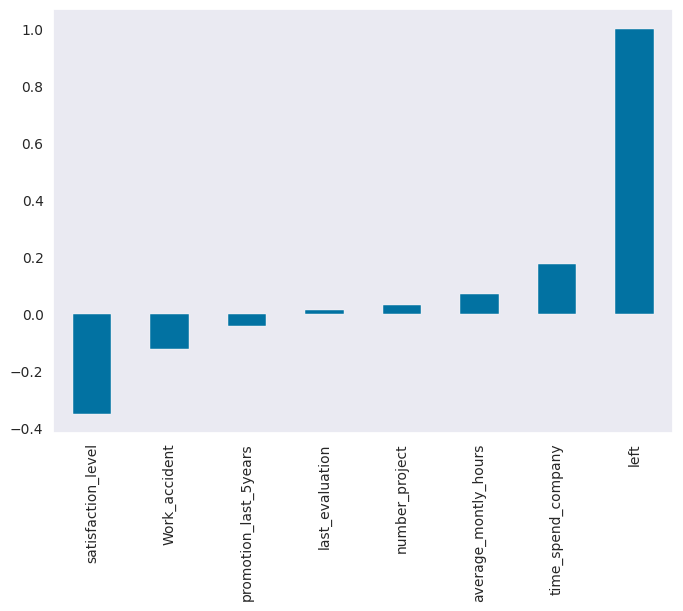

In [12]:
# plot correlation
df.corr()['left'].sort_values().plot(kind='bar')
plt.show()

In [13]:
df_num=df.select_dtypes(exclude ='object')
df_num.shape

(11991, 8)

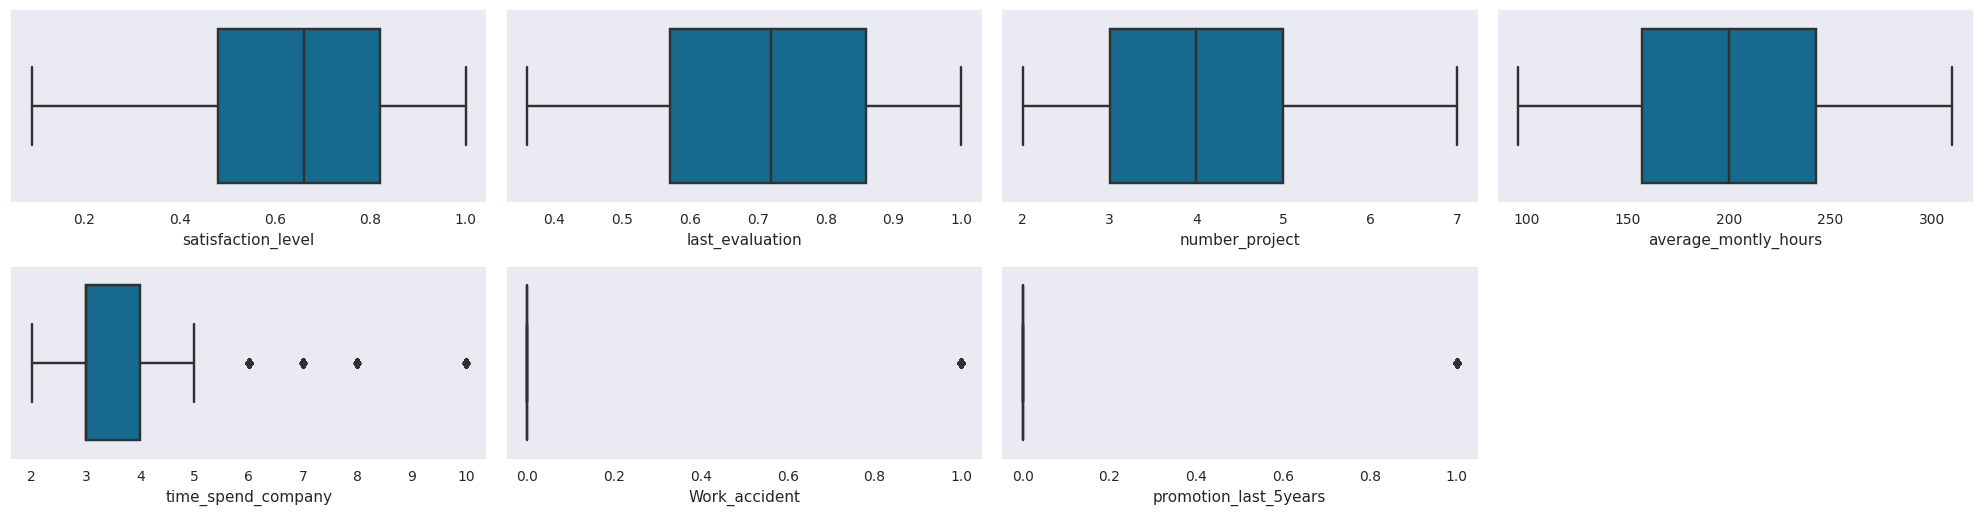

In [14]:
#Boxplot for checking of outliers
plt.figure(figsize=(20,10))
plotnumber = 1

for col in df_num.columns[:-1]:
    if plotnumber < 9:
        plt.subplot(4,4,plotnumber)
        sns.boxplot(df_num[col],orient='v')
        plt.xlabel(col)
    plotnumber +=1
plt.tight_layout()


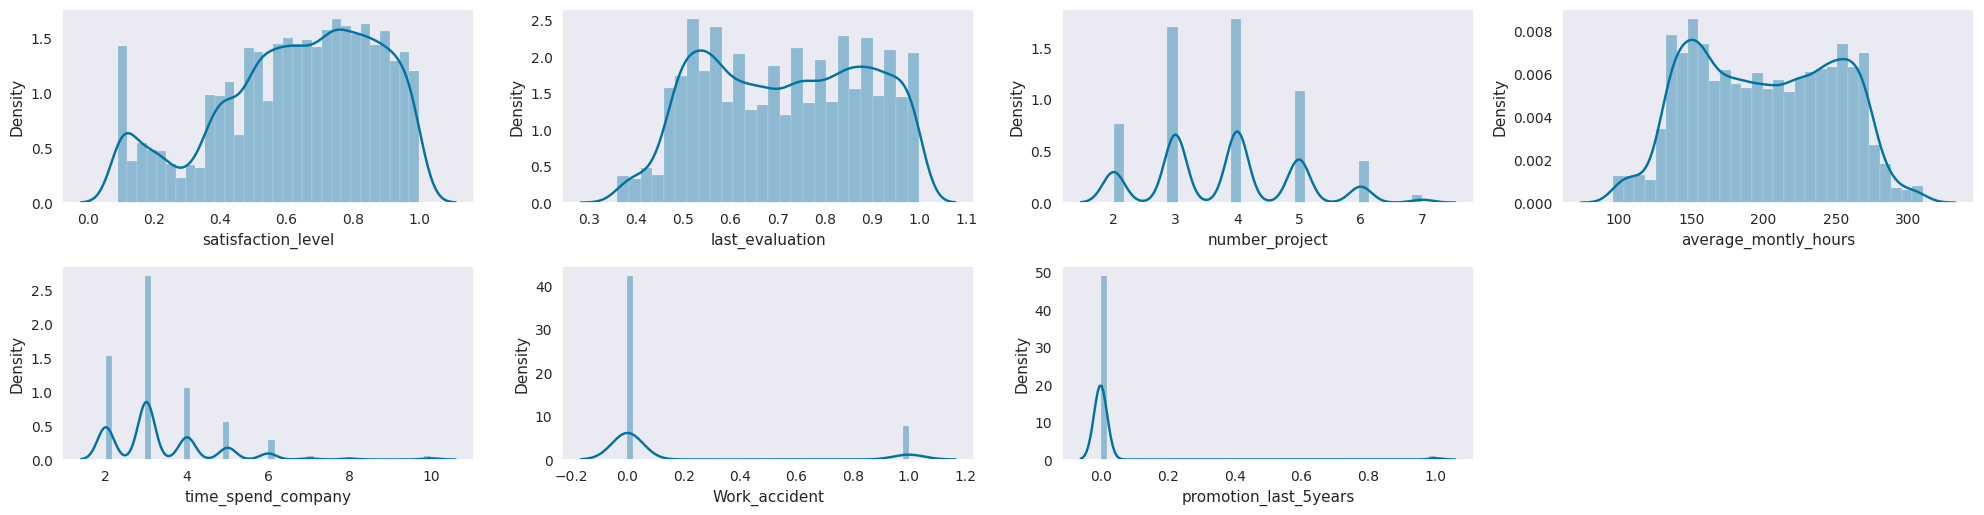

In [15]:
# histogram plot(for checking of skew,gaussian distribution)
plt.figure(figsize=(20,10))
plotnumber = 1

for col in df_num.columns[:-1]:
    if plotnumber < 9:
        plt.subplot(4,4,plotnumber)
        sns.distplot(df_num[col])
        plt.xlabel(col)
    plotnumber +=1
plt.tight_layout()


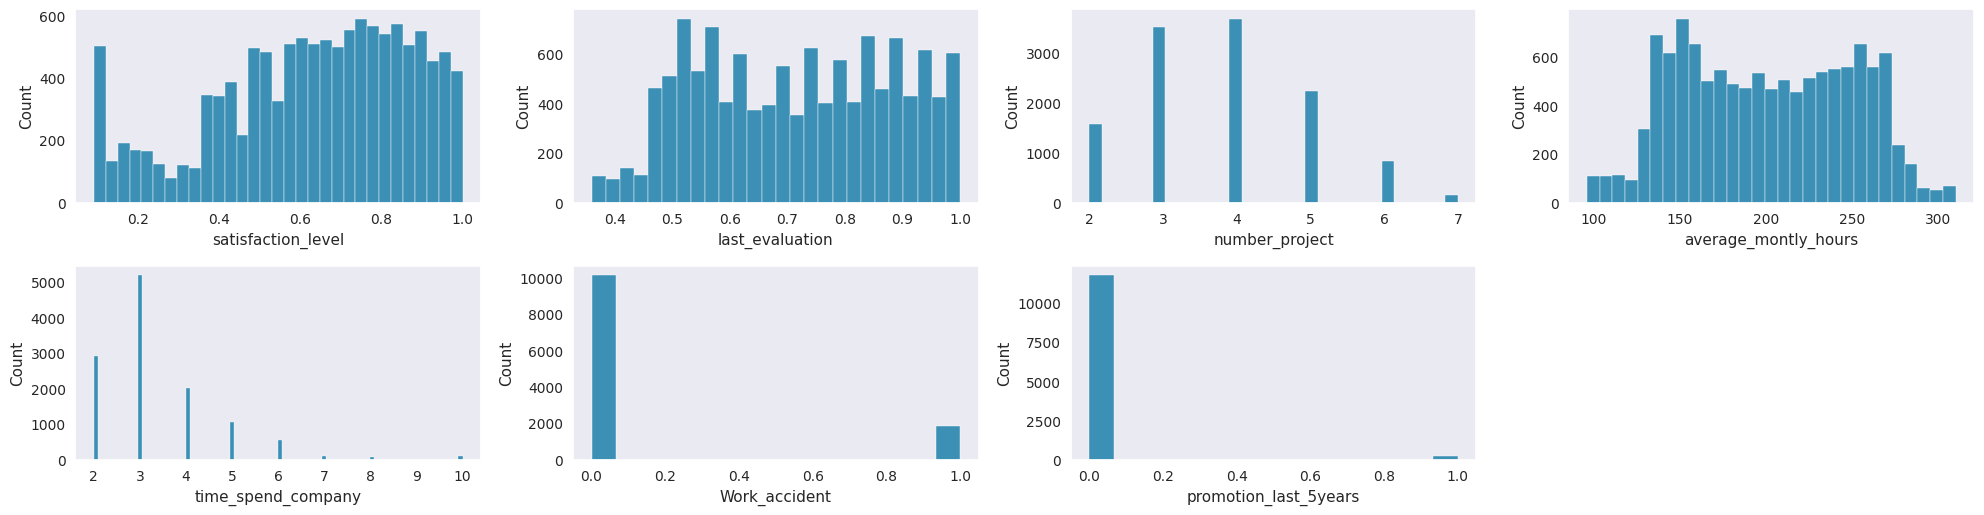

In [16]:
# histogram plot(for checking of skew,gaussian distribution)
plt.figure(figsize=(20,10))
plotnumber = 1

for col in df_num.columns[:-1]:
    if plotnumber < 9:
        plt.subplot(4,4,plotnumber)
        sns.histplot(df_num[col])
        plt.xlabel(col)
    plotnumber +=1
plt.tight_layout()


In [18]:
train, unseen = train_test_split(df,test_size=0.20, random_state=42,stratify = df['left'])
valid, unseen = train_test_split(unseen,test_size=0.50, random_state=42,stratify = unseen['left'])

df.shape,train.shape,valid.shape, unseen.shape


((11991, 10), (9592, 10), (1199, 10), (1200, 10))

In [22]:
df["left"].value_counts(normalize=True)*100,df["left"].value_counts()

(0    83.39588
 1    16.60412
 Name: left, dtype: float64,
 0    10000
 1     1991
 Name: left, dtype: int64)

In [23]:
valid["left"].value_counts(normalize=True)*100,valid["left"].value_counts()

(0    83.402836
 1    16.597164
 Name: left, dtype: float64,
 0    1000
 1     199
 Name: left, dtype: int64)

In [24]:
unseen["left"].value_counts(normalize=True)*100,unseen["left"].value_counts()

(0    83.416667
 1    16.583333
 Name: left, dtype: float64,
 0    1001
 1     199
 Name: left, dtype: int64)

In [33]:
#set up environment
history = setup(train,test_data=valid,
                     target='left',
                     silent=True,feature_selection=True,
                     normalize=True,fold = 5,
                     session_id=42)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
compare_models(sort='fbeta_score',exclude =['catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,fbeta_score,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9835,0.9852,0.9222,0.9774,0.9490,0.9391,0.9397,0.9582,0.9327,0.5600
gbc,Gradient Boosting Classifier,0.9804,0.9835,0.9159,0.9644,0.9395,0.9278,0.9283,0.9538,0.9252,0.8000
rf,Random Forest Classifier,0.9824,0.9793,0.9077,0.9850,0.9447,0.9343,0.9354,0.9514,0.9222,0.6260
dt,Decision Tree Classifier,0.9683,0.9461,0.9127,0.8984,0.9054,0.8864,0.8865,0.9455,0.9098,0.0820
et,Extra Trees Classifier,0.9737,0.9754,0.8927,0.9462,0.9186,0.9029,0.9035,0.9400,0.9028,0.6340
knn,K Neighbors Classifier,0.9610,0.9549,0.9058,0.8660,0.8853,0.8618,0.8623,0.9383,0.8974,0.9880
ada,Ada Boost Classifier,0.9641,0.9781,0.8751,0.9059,0.8902,0.8687,0.8690,0.9269,0.8810,0.3320
svm,SVM - Linear Kernel,0.9048,0.0000,0.7352,0.7051,0.7173,0.6603,0.6622,0.8291,0.7273,0.1140
lda,Linear Discriminant Analysis,0.8854,0.9239,0.7319,0.6355,0.6800,0.6107,0.6132,0.8187,0.7101,0.1560
lr,Logistic Regression,0.9041,0.9331,0.7024,0.7152,0.7087,0.6513,0.6514,0.8144,0.7049,9.3440


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# Final Preparation

In [37]:
#set up environment
history = setup(train,test_data=valid,
                     target='left',
                     silent=True,feature_selection=True,
                     normalize=True,fold = 5,
                     session_id=42)

# add metric geometric_mean
add_metric('geometric_mean', 'geometric mean', geometric_mean_score, greater_is_better = True)

# add metric fbeta score
add_metric('fbeta score', 'fbeta_score', fbeta_score,target = 'pred',beta = 2.0, greater_is_better = True)

# train using cross validation
best = compare_models(n_select=3,sort='fbeta_score',exclude =['catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,fbeta_score,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9835,0.9852,0.9222,0.9774,0.9490,0.9391,0.9397,0.9582,0.9327,0.2700
gbc,Gradient Boosting Classifier,0.9804,0.9835,0.9159,0.9644,0.9395,0.9278,0.9283,0.9538,0.9252,1.0360
rf,Random Forest Classifier,0.9824,0.9793,0.9077,0.9850,0.9447,0.9343,0.9354,0.9514,0.9222,0.6700
dt,Decision Tree Classifier,0.9683,0.9461,0.9127,0.8984,0.9054,0.8864,0.8865,0.9455,0.9098,0.0900
et,Extra Trees Classifier,0.9737,0.9754,0.8927,0.9462,0.9186,0.9029,0.9035,0.9400,0.9028,0.8860
knn,K Neighbors Classifier,0.9610,0.9549,0.9058,0.8660,0.8853,0.8618,0.8623,0.9383,0.8974,1.1800
ada,Ada Boost Classifier,0.9641,0.9781,0.8751,0.9059,0.8902,0.8687,0.8690,0.9269,0.8810,0.3780
svm,SVM - Linear Kernel,0.9048,0.0000,0.7352,0.7051,0.7173,0.6603,0.6622,0.8291,0.7273,0.1660
lda,Linear Discriminant Analysis,0.8854,0.9239,0.7319,0.6355,0.6800,0.6107,0.6132,0.8187,0.7101,0.1540
lr,Logistic Regression,0.9041,0.9331,0.7024,0.7152,0.7087,0.6513,0.6514,0.8144,0.7049,0.3480


In [38]:
best

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
           

In [39]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,fbeta_score
Fold,,,,,,,,,
0,0.9849,0.9891,0.9248,0.9833,0.9532,0.9442,0.9448,0.9601,0.9359
1,0.9802,0.9843,0.9091,0.9699,0.9385,0.9267,0.9274,0.9508,0.9206
2,0.9818,0.9773,0.9182,0.9701,0.9435,0.9326,0.9331,0.9555,0.9282
3,0.9854,0.9879,0.9214,0.9899,0.9544,0.9457,0.9466,0.9590,0.9343
4,0.9854,0.9876,0.9373,0.9739,0.9553,0.9466,0.9468,0.9657,0.9444
Mean,0.9835,0.9852,0.9222,0.9774,0.9490,0.9391,0.9397,0.9582,0.9327
Std,0.0022,0.0043,0.0092,0.0079,0.0067,0.0080,0.0080,0.0050,0.0080


In [40]:
tuned_lightgbm = tune_model(lightgbm,
                      n_iter=100,
                      optimize = 'fbeta_score')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,fbeta_score
Fold,,,,,,,,,
0,0.9849,0.9896,0.9279,0.9801,0.9533,0.9443,0.9448,0.9615,0.9379
1,0.9786,0.9805,0.9028,0.9664,0.9335,0.9208,0.9216,0.9472,0.9149
2,0.9833,0.9765,0.9182,0.9799,0.9481,0.9381,0.9388,0.9564,0.9299
3,0.9859,0.9869,0.9245,0.9899,0.9561,0.9477,0.9485,0.9606,0.9369
4,0.9849,0.9852,0.9342,0.9739,0.9536,0.9446,0.9449,0.9641,0.9418
Mean,0.9835,0.9837,0.9215,0.9780,0.9489,0.9391,0.9397,0.9580,0.9323
Std,0.0026,0.0047,0.0107,0.0078,0.0081,0.0097,0.0096,0.0059,0.0095


In [41]:
stack_model = stack_models(best,optimize='fbeta_score',choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,fbeta_score
Fold,,,,,,,,,
0,0.9844,0.9853,0.9216,0.9833,0.9515,0.9422,0.9429,0.9585,0.9333
1,0.9802,0.9838,0.9060,0.9731,0.9383,0.9265,0.9274,0.9494,0.9186
2,0.9818,0.9805,0.9151,0.9732,0.9433,0.9324,0.9330,0.9542,0.9262
3,0.9849,0.9875,0.9182,0.9898,0.9527,0.9437,0.9447,0.9573,0.9317
4,0.9849,0.9844,0.9342,0.9739,0.9536,0.9446,0.9449,0.9641,0.9418
Mean,0.9832,0.9843,0.9190,0.9787,0.9479,0.9379,0.9386,0.9567,0.9303
Std,0.0019,0.0023,0.0092,0.0068,0.0060,0.0071,0.0071,0.0048,0.0077


In [42]:
blend_model = blend_models(best,optimize='fbeta_score',choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,fbeta_score
Fold,,,,,,,,,
0,0.9854,0.9869,0.9248,0.9866,0.9547,0.9460,0.9467,0.9604,0.9365
1,0.9792,0.9817,0.9028,0.9697,0.9351,0.9227,0.9235,0.9475,0.9154
2,0.9812,0.9739,0.9119,0.9732,0.9416,0.9304,0.9311,0.9526,0.9236
3,0.9849,0.9869,0.9182,0.9898,0.9527,0.9437,0.9447,0.9573,0.9317
4,0.9849,0.9869,0.9342,0.9739,0.9536,0.9446,0.9449,0.9641,0.9418
Mean,0.9831,0.9832,0.9184,0.9786,0.9475,0.9375,0.9382,0.9564,0.9298
Std,0.0025,0.0051,0.0107,0.0080,0.0078,0.0093,0.0092,0.0058,0.0094


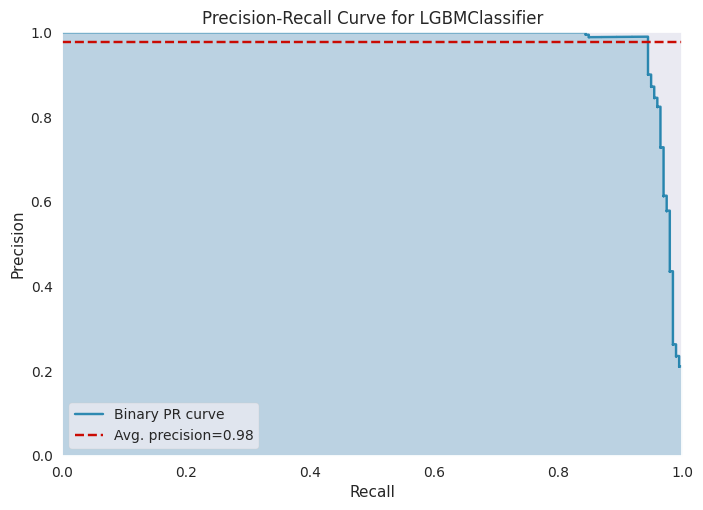

In [44]:
#plot precision-recall
plot_model(lightgbm,'pr')

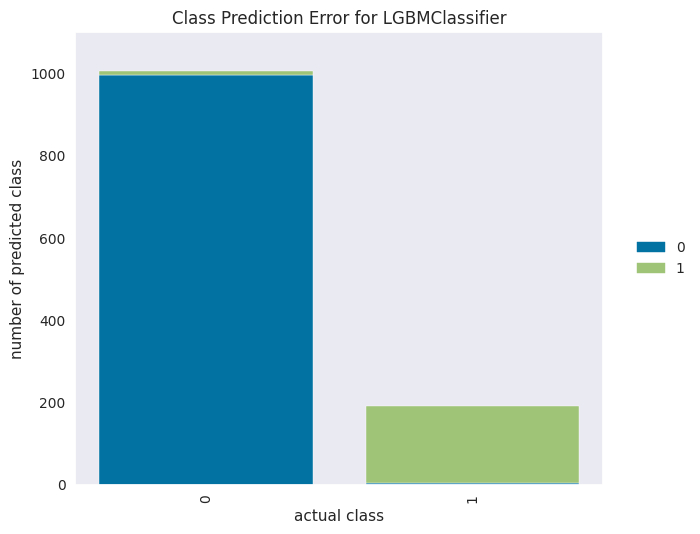

In [46]:
#plot - Class Prediction Error
plot_model(lightgbm,'error' )

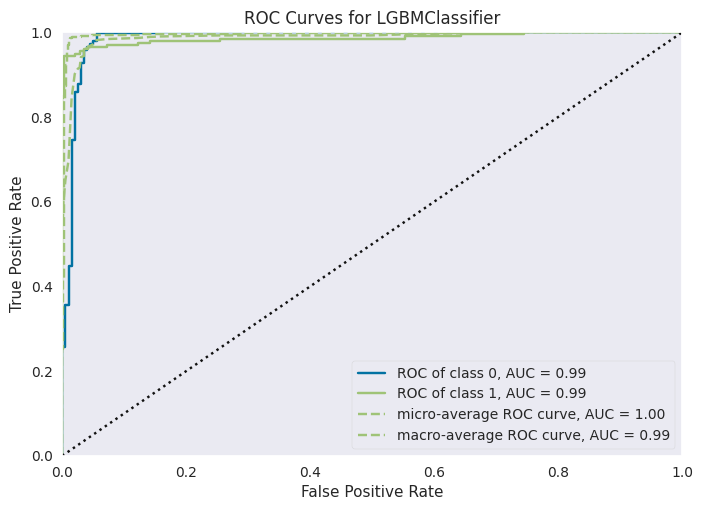

In [48]:
#plot - Class auc curve
plot_model(lightgbm,'auc')

In [43]:
# predict on hold-out set
pred_holdout = predict_model(lightgbm)
pred_holdout

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,fbeta_score
0,Light Gradient Boosting Machine,0.9875,0.9865,0.9447,0.9792,0.9616,0.9542,0.9544,0.9700,0.9514


,number_project_5,salary_low,department_RandD,time_spend_company_7,average_montly_hours,satisfaction_level,number_project_4,department_product_mng,department_sales,salary_high,...,promotion_last_5years_1,department_hr,time_spend_company_10,department_support,department_technical,department_marketing,last_evaluation,left,Label,Score
0,0.0,1.0,0.0,0.0,0.475678,0.208092,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-1.231753,0,0,0.9989
1,0.0,1.0,0.0,0.0,-0.202070,-0.123776,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.073835,0,0,0.9973
2,0.0,1.0,0.0,0.0,-1.167347,-1.036414,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-1.350443,1,1,0.9927
3,1.0,0.0,0.0,0.0,-0.612826,0.871829,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-1.172408,0,0,0.9986
4,1.0,0.0,0.0,0.0,-0.160994,-1.824602,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.201388,0,0,0.9964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,1.0,0.0,0.0,0.0,0.188148,0.498477,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.260733,0,0,0.9914
1195,0.0,0.0,0.0,0.0,-0.571751,-0.372677,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.172408,0,0,0.9975
1196,0.0,1.0,0.0,0.0,1.112350,-2.156470,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.320077,1,1,0.9999
1197,0.0,0.0,0.0,0.0,1.872249,-2.239437,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.379422,1,1,0.9998


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will b

/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The outputs_2d_ attribute is deprecated in version 0.22 and will be removed in version 0.24. It is equivalent to n_outputs_ > 1.
  warnings.warn(msg, category=FutureWarning)
/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value enco

In [52]:
#finalize
final=finalize_model(lightgbm)
final

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [53]:
#predict on test set(unseen)
prediction=predict_model(final,data=unseen)
prediction

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,geometric mean,fbeta_score
0,Light Gradient Boosting Machine,0.9800,0.9797,0.9146,0.9630,0.9381,0.9262,0.9267,0.9530,0.9239


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left,Label,Score
5342,0.28,0.90,4,275,6,0,0,marketing,low,0,0,0.9968
9215,0.57,0.58,3,192,3,0,0,technical,medium,0,0,0.9988
8936,0.98,0.50,3,198,3,0,0,marketing,medium,0,0,0.9999
3136,0.91,0.54,3,210,2,0,0,marketing,low,0,0,0.9985
9715,0.79,0.98,3,217,3,0,0,sales,low,0,0,0.9991
...,...,...,...,...,...,...,...,...,...,...,...,...
11853,0.71,0.63,3,204,3,0,0,marketing,low,0,0,0.9989
3165,0.81,0.83,4,259,3,1,0,technical,low,0,0,0.9967
6543,0.81,0.73,4,258,2,0,0,technical,low,0,0,0.9977
3050,0.85,0.82,6,141,5,0,0,RandD,low,0,0,0.9606


In [54]:
prediction[prediction['left'] ==1][0:12]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left,Label,Score
1844,0.37,0.51,2,154,3,1,0,sales,low,1,1,0.9745
657,0.43,0.55,2,130,3,0,0,support,high,1,1,0.9909
1649,0.38,0.51,2,138,3,0,0,technical,low,1,1,0.9942
1998,0.84,0.96,4,247,5,0,0,sales,low,1,1,0.9732
1147,0.83,0.95,5,258,5,0,0,technical,low,1,1,0.9909
672,0.46,0.57,2,154,3,0,0,IT,low,1,1,0.9822
363,0.72,0.96,5,267,5,0,0,technical,low,1,1,0.9134
1631,0.10,0.85,6,283,4,0,0,sales,medium,1,1,0.9979
62,0.10,0.95,6,244,5,0,0,IT,medium,1,1,0.9996
1679,0.43,0.55,2,159,3,0,0,RandD,low,1,1,0.9883


In [55]:
#confusion matrix
print(confusion_matrix(prediction["left"],prediction["Label"]))

[[994   7]
 [ 17 182]]


In [56]:
# imbalanced classification report
print(classification_report_imbalanced(prediction["left"],prediction["Label"]))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.99      0.91      0.99      0.95      0.92      1001
          1       0.96      0.91      0.99      0.94      0.95      0.90       199

avg / total       0.98      0.98      0.93      0.98      0.95      0.91      1200



In [58]:
save_model(final,"employee-jan9-2022-lightgbm")

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), model_name=employee-jan9-2022-lightgbm, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='left',
                                      t

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='left',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20,